# **Predictive Analytics Project: [(Diabetes Prediction)](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download)**
- **Nama:** Indira Aline
- **Email:** indiradira63@gmail.com
- **ID Dicoding:** indira_kbs

## **About Dataset**

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# **Import Semua Packages/Library yang Digunakan**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

from scipy import stats

# Mount Google Drive (Colab)
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Loading**


Dataset yang akan digunakan bernama diabetes_prediction_dataset.csv

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yongpon","key":"1dd3283e358f8b2e41141009ae9eed48"}'}

In [ ]:
# Setup Kaggle API authentication
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -l /root/.kaggle/

total 4
-rw------- 1 root root 63 May  2 07:22 kaggle.json


In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors


In [ ]:
import zipfile,os,shutil

In [ ]:
fileZip = "diabetes-prediction-dataset.zip"
extracZip = zipfile.ZipFile(fileZip, 'r')
extracZip.extractall("dataset")

In [ ]:
os.listdir("/content/dataset")

['diabetes_prediction_dataset.csv']

In [ ]:
data = pd.read_csv('dataset/diabetes_prediction_dataset.csv')

About this file

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

# **Exploratory Data Analysis**

## Struktur Data

In [ ]:
# Menampilkan informasi tentang dimensi data
print(data.shape)

# Menampilakn beberapa baris terakhir dari data
print(data.tail())

# Menampilakn nama-nama kolom pada data
print(data.columns)

# Menampilkan beberapa baris pertama dari data
data.head(10)

(100000, 9)
       gender   age  hypertension  heart_disease smoking_history    bmi  \
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Missing Values

In [ ]:
print(f"Jumlah data hilang pada dataset: \n{data.isna().sum()}")

Jumlah data hilang pada dataset: 
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## Univariate Analysis

<ipython-input-17-9f6c2480f309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')
<ipython-input-17-9f6c2480f309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')
<ipython-input-17-9f6c2480f309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')
<ipython-input-17-9f6c2480f309>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

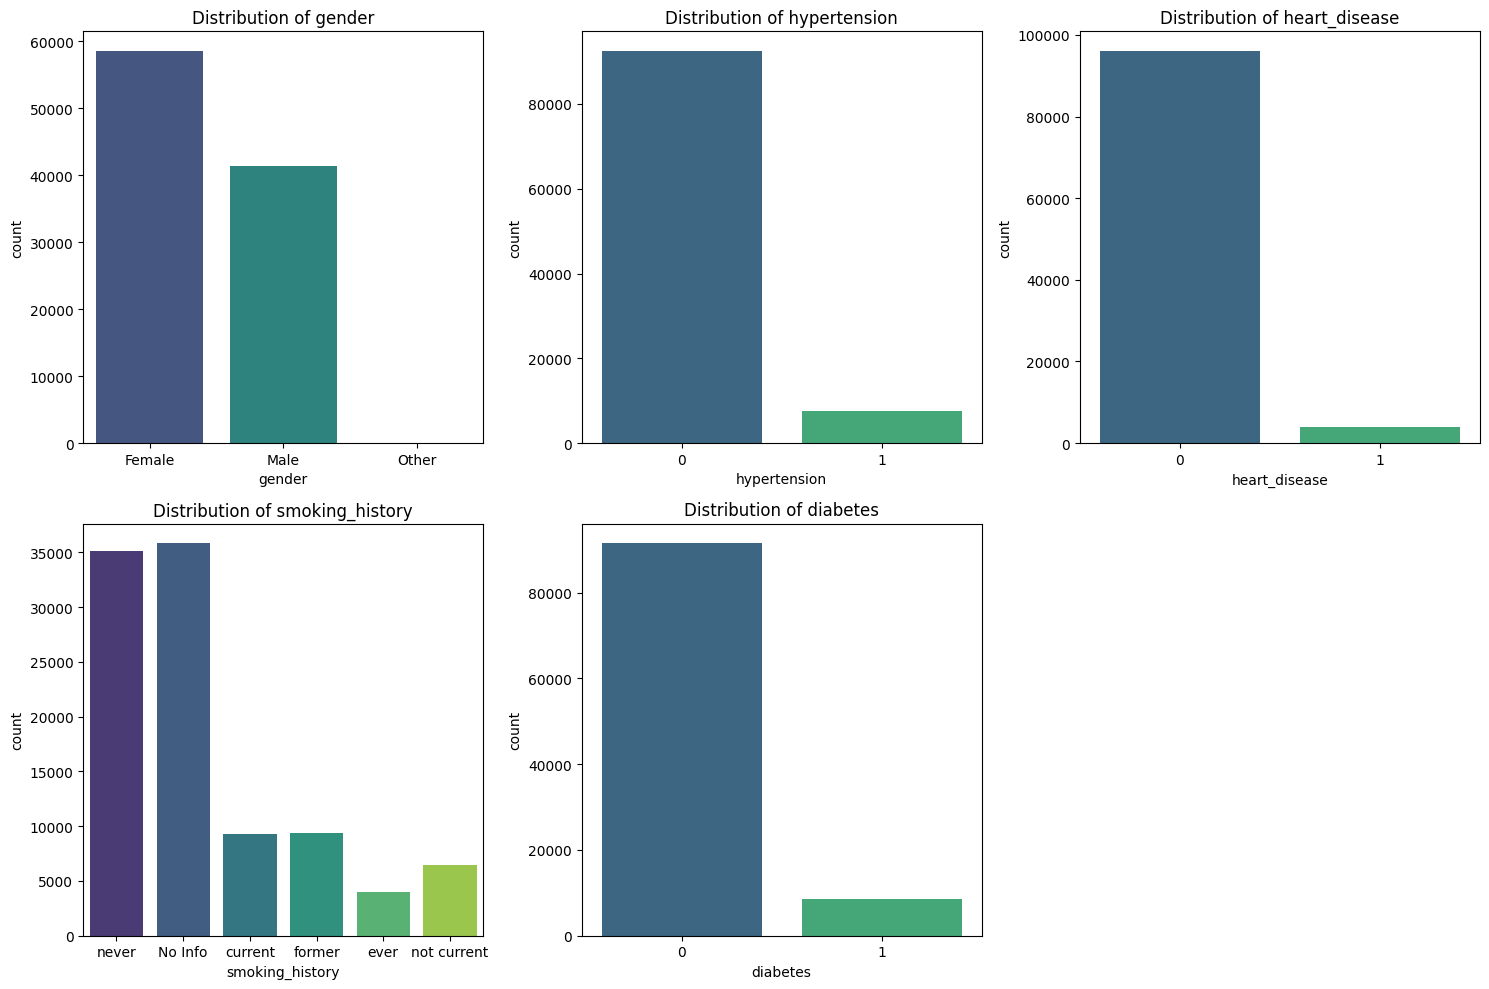

In [ ]:
## A. Categorical Variables

cat_vars = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_vars, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

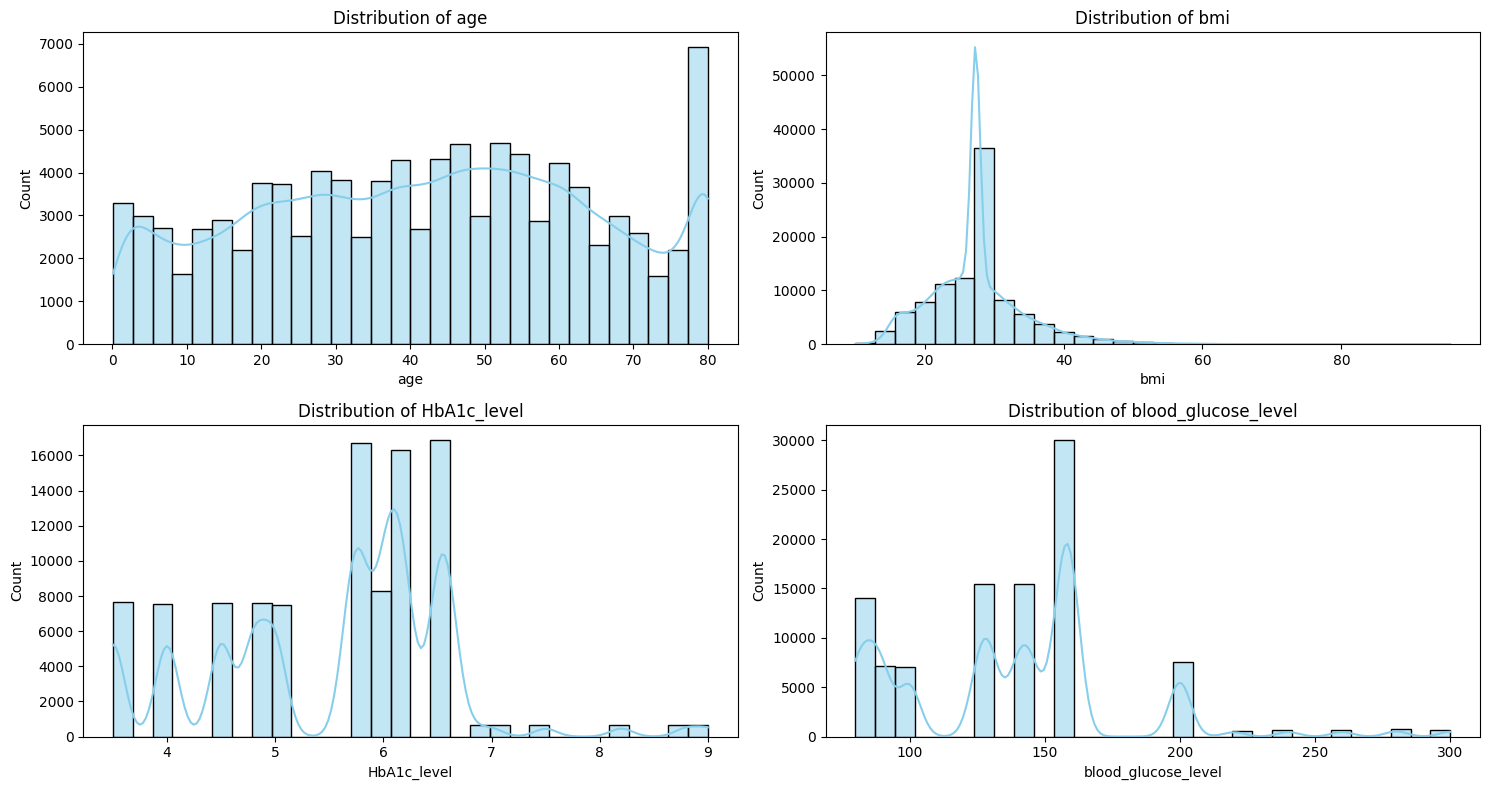

In [ ]:
## B. Numerical Variables

num_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Bivariate Analysis

<ipython-input-21-a1610d6df56f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diabetes', y='HbA1c_level', palette='pastel')


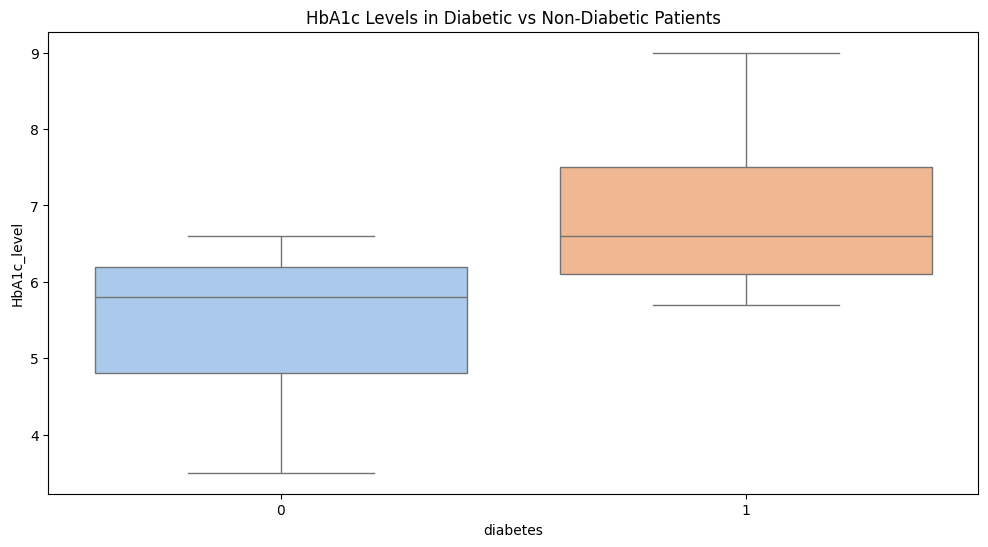

In [ ]:
##A. Diabetes vs. Key Features

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='diabetes', y='HbA1c_level', palette='pastel')
plt.title("HbA1c Levels in Diabetic vs Non-Diabetic Patients")
plt.show()

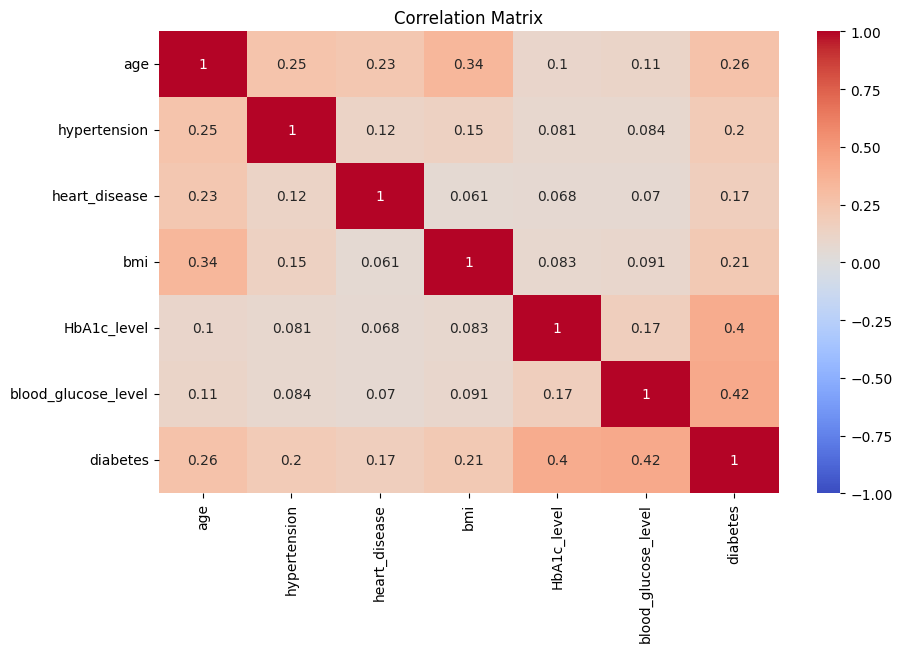

In [ ]:
## B. Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

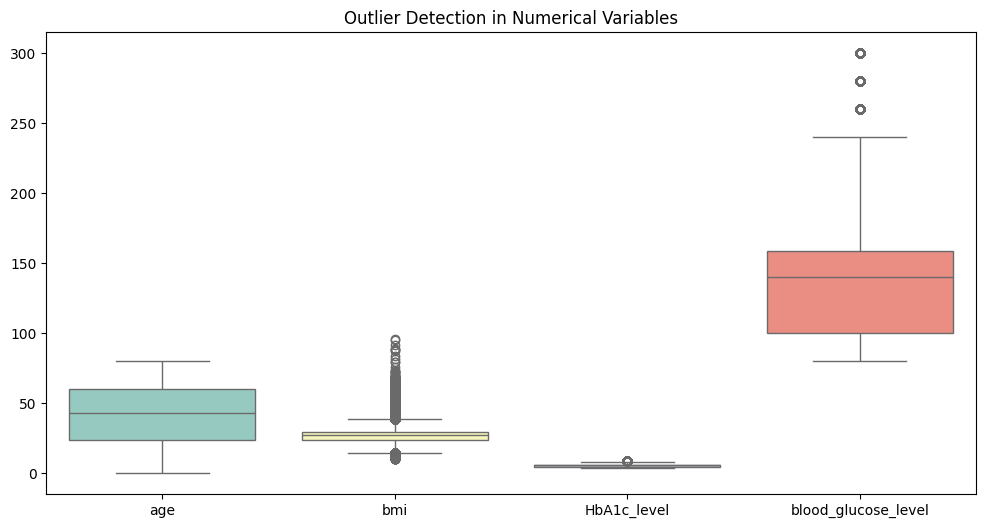

In [ ]:
## Outlier Detection

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']], palette='Set3')
plt.title("Outlier Detection in Numerical Variables")
plt.show()

In [ ]:
## Class Imbalance Analysis

print("\nDiabetes Class Distribution:\n", data['diabetes'].value_counts(normalize=True))


Diabetes Class Distribution:
 diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


# **Data Preprocessing**

#### Split Dataset

In [ ]:
# Pra-pemrosesan data
# Mengganti nilai kategorikal pada kolom 'gender' dengan nilai numerik
data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})

# Mengganti nilai kategorikal pada kolom 'smoking_history' dengan nilai numerik
data['smoking_history'] = data['smoking_history'].replace({
    'No Info': 0,
    'never': 1,
    'former': 2,
    'current': 3,
    'not current': 4,
    'ever': 5
})

<ipython-input-10-35c19d1aa1c9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
<ipython-input-10-35c19d1aa1c9>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoking_history'] = data['smoking_history'].replace({


### Memisahkan data menjadi fitur (features) dan label


In [ ]:
# Fitur (features) yang akan digunakan dalam pemoodelan
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Kolom target (label) yang diprediksi
label = ['diabetes']

# Memisahkan data menjadi fitur (X) dan label (y)
X = data[features]
y = data [label]

### Membagi data latih dan data uji

In [ ]:
# Memisahkan data menjadi data latih dan data uji
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Membuat objek RandomForestClassifier
clf_true = RandomForestClassifier(n_estimators=10)

# Melatih model dengan data latih
clf_true.fit(X_true_train, y_true_train)

# Melakukan prediksi pada data uji
y_true_pred = clf_true.predict(X_true_test)

# Menghitung akurasi prediksi
print("Akurasi Dasar:", metrics.accuracy_score(y_true_test, y_true_pred))

# Menampilkan laporan klasifikasi
print("Laporan klasifikasi dasar:\n", metrics.classification_report(y_true_test, y_true_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Akurasi Dasar: 0.9704
Laporan klasifikasi dasar:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      9141
           1       0.94      0.70      0.80       859

    accuracy                           0.97     10000
   macro avg       0.95      0.85      0.89     10000
weighted avg       0.97      0.97      0.97     10000



1.   Akurasi Keseluruhan: 0.9784 (97.84%)
  *   Model ini sangat akurat dalam memprediksi secara keseluruhan


2.   Laporan Klasifikasi:
  *   Kelas 0 (mayoritas):
      *   Precision: 97% - Dari semua prediksi kelas 0, 97% benar
      *   Recall: 100% - Model berhasil mengidentifikasi semua instance kelas 0 yang sebenarnya
      *   F1-score: 0.98 - Keseimbangan antara precision dan recall yang sangat baik

  *   Kelas 1 (minoritas):
      *   Precision: 94% - Dari semua prediksi kelas 1, 94% benar
      *   Recall: 70% - Model hanya berhasil mengidentifikasi 70% dari instance kelas 1 yang sebenarnya
      *   F1-score: 0.80 - Lebih rendah dibanding kelas 0


3.   Ketidakseimbangan Kelas:
  *   Jumlah data: 9141 untuk kelas 0 vs 859 untuk kelas 1
  *   Model lebih baik memprediksi kelas mayoritas (0) dibanding kelas minoritas (1)



## Modelling

Model yang digunakan pada proyek ini adalah **Model GAN (Generative Adversarial Network)**.

**GAN (Generative Adversarial Network)** adalah arsitektur deep learning yang terdiri dari dua jaringan neural yang saling bersaing:

Komponen Utama GAN:

1.   Generator:
  *   Bertugas membuat data sintetis yang menyerupai data asli
  *   Menerima input noise vector dan menghasilkan sampel palsu


2.   Discriminator:
  *   Bertugas membedakan antara data asli dan data palsu dari generator
  *   Bertindak sebagai classifier biner (asli vs palsu)






In [ ]:
def generate_latent_points(latent_dim, n_samples):
    # Menghasilkan titik-titik laten acak
    x_input = randn(latent_dim * n_samples)
    # Mengubah bentuk titik-titik laten menjadi matriks
    x_input = x_input.reshape(n_samples, latent_dim)
    # Mengembalikan titik-titik laten yang dihasilkan
    return x_input

In [ ]:
# Menggunakan generator untuk menghasilkan m contoh palsu, dengan label kelas
def generate_fake_samples(generator, latent_dim, n_samples):
    # Menghasilkan titik-titik laten acak sebagai input generator
    x_input = generate_latent_points(latent_dim, n_samples)
    # Menghasilkan contoh palsu menggunakan generator
    X = generator.predict(x_input)
    # Membuat array label kelas palsu dengan nilai 0
    y = np.zeros((n_samples, 1))
    # Mengembalikan contoh palsu dan labelnya
    return X, y

In [ ]:
# Menghasilkan n contoh nyata dengan label kelas; secara acak memilih n sampel dari data nyata
def generate_real_samples(n):
    # Memilih secara acak n sampel dari data nyata
    X = data.sample(n)
    # Membuat array label kelas nyata dengan nilai 1
    y = np.ones((n, 1))
    return X, y

In [ ]:
# Mendefinisikan generator dengan dimensi laten yang diberikan dan jumlah output yang ditentukan (default = 9)
def define_generator(latent_dim, n_outputs=9):
    # Membuat model Sequential
    model = Sequential()
    # Menambahkan layer Dense dengan 15 unit, fungsi aktivasi ReLU, dan inisialisasi bobot He
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    # Menambahkan layer Dense dengan 30 unit dan fungsi aktivasi ReLU
    model.add(Dense(30, activation='relu'))
    # Menambahkan layer Dense dengan jumlah output yang ditentukan dan fungsi aktivasi linear
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [ ]:
# Mendefinisikan generator1 dengan dimensi laten 10 dan jumlah output 9
generator1 = define_generator(10, 9)

# Menampilkan ringkasan (summary) dari generator1
generator1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           279 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924 (3.61 KB)

 Trainable params: 924 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Mendefinisikan discriminator dengan jumlah input yang ditentukan (default = 9)
def define_discriminator(n_inputs=9):
    # Membuat model Sequential
    model = Sequential()
    # Menambahkan layer Dense dengan 25 unit, fungsi aktivasi ReLU, dan inisialisasi bobot He
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    # Menambahkan layer Dense dengan 50 unit dan fungsi aktivasi ReLU
    model.add(Dense(50, activation='relu'))
    # Menambahkan layer Dense dengan 1 unit dan fungsi aktivasi sigmoid
    model.add(Dense(1, activation='sigmoid'))
    # Mengompilasi model dengan loss function binary_crossentropy, optimizer adam, dan metrik akurasi
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Mendefinisikan model GAN yang terdiri dari generator dan discriminator, yang digunakan untuk memperbarui generator
def define_gan(generator, discriminator):
    # Membuat bobot pada discriminator tidak dapat di-train
    discriminator.trainable = False
    # Membuat model Sequential
    model = Sequential()
    # Menambahkan generator ke dalam model
    model.add(generator)
    # Menambahkan discriminator ke dalam model
    model.add(discriminator)
    # Mengompilasi model dengan loss function binary_crossentropy dan optimizer adam
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [ ]:
# Membuat line plot dari loss untuk GAN dan menyimpan ke file
def plot_history(d_hist, g_hist):
    # Menampilkan plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='Discriminator')
    plt.plot(g_hist, label='Generator')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('GAN Training Loss')
    plt.show()
    plt.close()

In [ ]:
# Melatih generator dan discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=500, n_batch=128, n_eval=200):
    # Menentukan setengah ukuran satu batch, untuk memperbarui discriminator
    half_batch = int(n_batch / 2)
    d_history = []
    g_history = []

    # Melakukan iterasi secara manual pada setiap epoch
    for epoch in range(n_epochs):
        # Menyiapkan sampel-sampel asli
        x_real, y_real = generate_real_samples(half_batch)
        # Menyiapkan contoh palsu
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # Memperbarui discriminator
        d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
        d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        # Menyiapkan titik-titik di dalam ruang laten sebagai input untuk generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # Membuat label terbalik untuk sampel-sampel palsu
        y_gan = np.ones((n_batch, 1))
        # Memperbarui generator melalui kesalahan discriminator
        g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

        print('%d, d1=%.3f, d2=%.3f, d=%.3f, g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss, g_loss_fake))

        # Menyimpan nilai loss
        d_history.append(d_loss)
        g_history.append(g_loss_fake)

        # Mengevaluasi model
        if (epoch+1) % n_eval == 0:
            plot_history(d_history, g_history)

    # Menyimpan model generator yang telah dilatih
    g_model.save('trained_generated_model.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1, d1=0.000, d2=0.377, d=0.188, g=0.634
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2, d1=0.251, d2=0.374, d=0.312, g=0.643
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3, d1=0.299, d2=0.376, d=0.337, g=0.637
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4, d1=0.322, d2=0.381, d=0.351, g=0.636
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5, d1=0.338, d2=0.381, d=0.360, g=0.631
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6, d1=0.346, d2=0.382, d=0.364, g=0.627
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
7, d1=0.353, d2=0.385, d=0.369, g=0.623
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8, d1=0.359, d2=0.388, d=0.374, g=0.621
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
9, d1=0.365, d2=0.390, d=0.378, g=0.617
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
10, d1=0.370, d2=0.394, d=0.382, g=0.614
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
11, d1=0.375, d2=0.396, d=0.386, g=0.610
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
12, d1=0.379, d2=0.399, d=0.389, g=0.606
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13, d1=0.383, d2=0.403, d=0.393, g=0.603
2/2 ━━━━━━━━━━━━━━━━

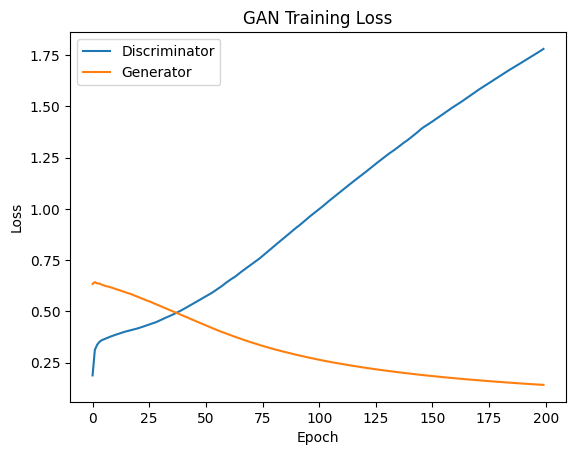

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
201, d1=1.781, d2=1.792, d=1.786, g=0.141
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
202, d1=1.788, d2=1.799, d=1.793, g=0.141
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
203, d1=1.794, d2=1.806, d=1.800, g=0.140
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
204, d1=1.801, d2=1.812, d=1.807, g=0.139
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
205, d1=1.808, d2=1.819, d=1.813, g=0.139
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
206, d1=1.814, d2=1.826, d=1.820, g=0.138
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
207, d1=1.821, d2=1.832, d=1.827, g=0.137
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
208, d1=1.828, d2=1.839, d=1.833, g=0.137
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
209, d1=1.835, d2=1.844, d=1.840, g=0.136
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
210, d1=1.840, d2=1.850, d=1.845, g=0.135
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
211, d1=1.846, d2=1.857, d=1.851, g=0.135
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
212, d1=1.852, d2=1.863, d=1.858, g=0.134
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
21

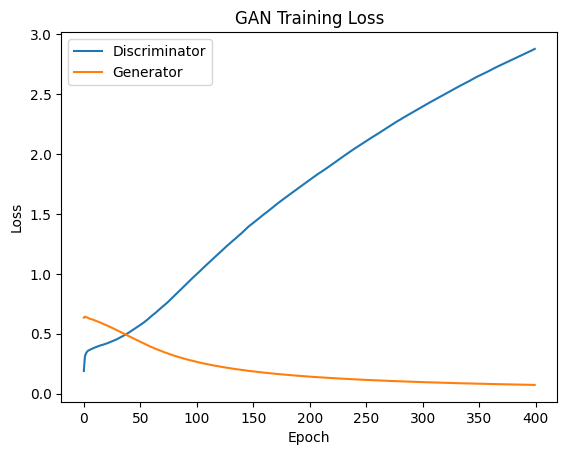

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
401, d1=2.879, d2=2.887, d=2.883, g=0.072
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
402, d1=2.883, d2=2.891, d=2.887, g=0.072
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
403, d1=2.888, d2=2.895, d=2.891, g=0.072
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
404, d1=2.892, d2=2.901, d=2.896, g=0.071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
405, d1=2.897, d2=2.906, d=2.901, g=0.071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
406, d1=2.902, d2=2.910, d=2.906, g=0.071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
407, d1=2.906, d2=2.914, d=2.910, g=0.071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
408, d1=2.911, d2=2.919, d=2.915, g=0.071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
409, d1=2.915, d2=2.923, d=2.919, g=0.071
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
410, d1=2.920, d2=2.928, d=2.924, g=0.070
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
411, d1=2.924, d2=2.932, d=2.928, g=0.070
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
412, d1=2.929, d2=2.937, d=2.933, g=0.070
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
41

500, d1=3.267, d2=3.274, d=3.271, g=0.058


In [ ]:
# Ukuran dari ruang laten
latent_dim = 10

# Membuat discriminator
discriminator = define_discriminator()

# Membuat generator
generator = define_generator(latent_dim)

# Membuat model GAN
gan_model = define_gan(generator, discriminator)

# Melatih model
train(generator, discriminator, gan_model, latent_dim)

In [ ]:
# Memuat model yang telah dilatih
model = load_model('/content/trained_generated_model.h5')

In [ ]:
# Menghasilkan titik-titik dalam ruang laten
latent_points = generate_latent_points(10, 750)

# Menggunakan model generator untuk menghasilkan data palsu
X = model.predict(latent_points)

# Membuat DataFrame dari data palsu
data_fake = pd.DataFrame(data=X, columns=['gender', 'age', 'hypertension',
                                         'heart_disease', 'smoking_history', 'bmi',
                                         'HbA1c_level', 'blood_glucose_level', 'diabetes'])

# Menampilkan 5 baris pertama dari data palsu
data_fake.head()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3.636813,-2.162575,-0.959190,5.205992,1.065802,7.277212,-1.678620,-0.152138,-4.211688
1,4.479905,-3.421516,-0.787348,5.668336,0.427189,8.276950,-2.297616,0.358667,-5.454226
2,4.910693,-6.863530,-2.213343,8.899097,0.527984,11.075001,-3.221867,-0.170747,-7.839132
3,5.613640,-4.782200,-2.571155,10.935043,-0.762683,14.065293,-5.096890,0.929920,-8.910564
4,4.239230,-3.408974,-1.742289,6.383330,0.645682,9.622299,-2.871614,0.125296,-5.540455


In [ ]:
# Menghitung rata-rata diabetes pada data palsu
diabetes_mean = data_fake.diabetes.mean()

# Mengubah nilai diabetes menjadi True jika lebih besar dari rata-rata, dan False jika sebaliknya
data_fake['diabetes'] = data_fake['diabetes'] > diabetes_mean

# Mengubah tipe data diabetes menjadi integer
data_fake["diabetes"] = data_fake["diabetes"].astype(int)

In [ ]:
# Menentukan fitur-fitur yang digunakan
features = ['gender', 'age', 'hypertension', 'heart_disease',
            'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Menentukan label yang digunakan
label = ['diabetes']

# Mengambil fitur-fitur dari data palsu
X_fake_created = data_fake[features]

# Mengambil label dari data palsu
y_fake_created = data_fake[label]

In [ ]:
# Membagi data palsu menjadi data latih dan data uji
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(
    X_fake_created, y_fake_created, test_size=0.30, random_state=42
)

# Membuat dan melatih model dengan data palsu
clf_fake = RandomForestClassifier(n_estimators=10)
clf_fake.fit(X_fake_train, y_fake_train)

# Memprediksi label menggunakan model data palsu
y_fake_pred = clf_fake.predict(X_fake_test)

# Menghitung akurasi model data palsu
accuracy_fake = metrics.accuracy_score(y_fake_test, y_fake_pred)

# Menampilkan laporan klasifikasi model data palsu
classification_report_fake = metrics.classification_report(y_fake_test, y_fake_pred)

print("Accuracy of fake data model:", accuracy_fake)
print("Classification report of fake data model:")
print(classification_report_fake)

Accuracy of fake data model: 0.8977777777777778
Classification report of fake data model:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        96
           1       0.91      0.91      0.91       129

    accuracy                           0.90       225
   macro avg       0.90      0.89      0.90       225
weighted avg       0.90      0.90      0.90       225



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


*   Model ini memiliki performa yang cukup baik secara keseluruhan, mampu memprediksi dengan benar hampir 90% dari total data.
*   Kelas 1 memiliki performa sedikit lebih baik dibanding Kelas 0
*   Tidak ada ketimpangan performa yang signifikan antara kedua kelas
*   Performa yang seimbang antara kedua kelas
*   Recall dan precision yang relatif seragam untuk masing-masing kelas
*   Tidak ada indikasi bias yang kuat terhadap salah satu kelas







## Evaluasi dan Visualisasi

Tahapan Analisis yang Dilakukan:

1.   Iterasi melalui setiap kolom data:
  *   Kode melakukan loop untuk setiap kolom dalam dataset
  *   Untuk setiap kolom, dibandingkan statistik antara data asli dan sintetik


2.   Perhitungan statistik deskriptif:
  *   Menghitung mean (rata-rata) dan standar deviasi (std) untuk:
      *   Data asli (data[col])
      *   Data sintetik (data_fake[col])


3.   Uji Kolmogorov-Smirnov (KS Test):
  *   Dilakukan untuk menguji apakah distribusi data sintetik sama dengan data asli
  *   Menghasilkan p-value yang menunjukkan signifikansi perbedaan distribusi




In [ ]:
# Bandingkan distribusi statistik untuk setiap kolom
for col in data.columns:
    print(f"\nKolom: {col}")
    print("Data Asli - Mean:", data[col].mean(), "Std:", data[col].std())
    print("Data Sintetik - Mean:", data_fake[col].mean(), "Std:", data_fake[col].std())
    # Uji KS (Kolmogorov-Smirnov)
    print("KS Test p-value:", stats.ks_2samp(data[col], data_fake[col])[1])


Kolom: gender
Data Asli - Mean: 0.41466 Std: 0.4930309475023161
Data Sintetik - Mean: 4.1832194 Std: 1.1859856843948364
KS Test p-value: 0.0

Kolom: age
Data Asli - Mean: 41.885856 Std: 22.51683987161513
Data Sintetik - Mean: -4.223955 Std: 1.6122615337371826
KS Test p-value: 0.0

Kolom: hypertension
Data Asli - Mean: 0.07485 Std: 0.2631504702291422
Data Sintetik - Mean: -1.7570871 Std: 0.9775375723838806
KS Test p-value: 0.0

Kolom: heart_disease
Data Asli - Mean: 0.03942 Std: 0.19459301699790674
Data Sintetik - Mean: 6.9068136 Std: 2.0302140712738037
KS Test p-value: 0.0

Kolom: smoking_history
Data Asli - Mean: 1.27465 Std: 1.4030598929737683
Data Sintetik - Mean: 0.34557155 Std: 0.7434336543083191
KS Test p-value: 3.0234230098775725e-142

Kolom: bmi
Data Asli - Mean: 27.3207671 Std: 6.636783416649581
Data Sintetik - Mean: 9.936978 Std: 2.9081523418426514
KS Test p-value: 0.0

Kolom: HbA1c_level
Data Asli - Mean: 5.527507 Std: 1.0706720918832282
Data Sintetik - Mean: -2.5154483 Std

Hasil Analisis dan Interpretasi

1.   Perbedaan Statistik yang Ekstrim
*   Terdapat perbedaan sangat besar antara data asli dan sintetik di semua kolom
*   Contoh
  *   Kolom `gender`: Mean asli 0.41 vs sintetik 4.18
  *   Kolom `age`: Mean asli 41.89 vs sintetik 4.22
  *   Kolom `HbA1c_level`: Mean asli 5.53 vs sintetik -2.52


2.   Hasil KS Test yang Signifikan
*   Semua kolom menunjukkan p-value = 0.0 atau sangat mendekati 0
*   Ini berarti perbedaan distribusi sangat signifikan secara statistik
*   Bahkan untuk kolom dengan perbedaan terkecil (`smoking_history`) pun p-value sangat kecil (3.02e-142)


3.   Masalah pada Data Sintetik
*   Data sintetik:
  *   Memiliki skala yang sangat berbeda
  *   Nilai mean tidak masuk akal untuk konteks variabel (misal usia 4.22 atau HbA1c negatif)
  *   Variansi (std) juga sangat berbeda





Penyebab Potensial

*   Model generatif (mungkin GAN) tidak berhasil mempelajari distribusi asli
*   Mungkin terjadi mode collapse atau masalah training lainnya
*   Data input dan output mungkin dalam skala yang berbeda
*   Tidak ada normalisasi/standarisasi yang tepat
*   Model generatif mungkin terlalu sederhana
*   Hyperparameter tidak optimal





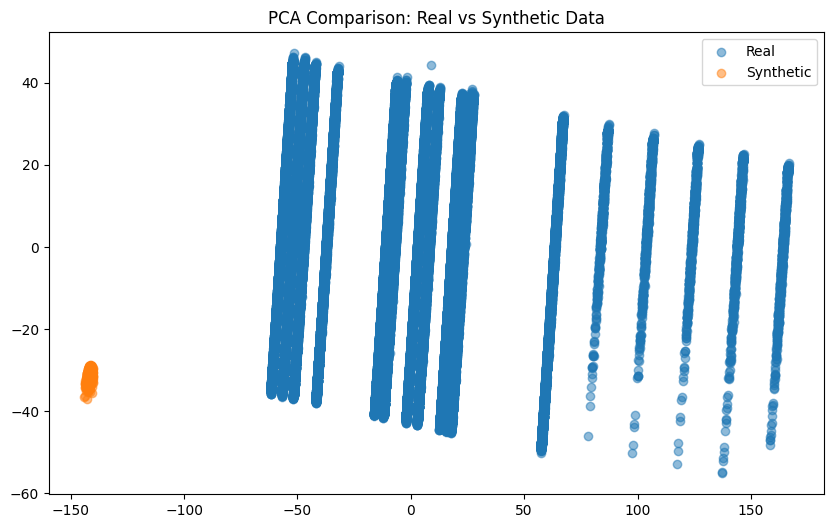

In [ ]:
# Gabungkan data asli dan sintetik
combined = pd.concat([data.assign(Source='Real'), data_fake.assign(Source='Synthetic')])

# Lakukan PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(combined.drop('Source', axis=1))

# Visualisasikan
plt.figure(figsize=(10,6))
for source in ['Real', 'Synthetic']:
    idx = combined['Source'] == source
    plt.scatter(pca_results[idx, 0], pca_results[idx, 1], label=source, alpha=0.5)
plt.legend()
plt.title('PCA Comparison: Real vs Synthetic Data')
plt.show()

Interpretasi Hasil PCA

1.    Distribusi yang Sangat Berbeda
*   Data asli (Real) dan sintetik (Synthetic) menempati wilayah yang sama sekali berbeda dalam ruang PCA
*   Tidak ada overlap yang signifikan antara kedua distribusi


2.   Skala yang Tidak Kompatibel
*   Sumbu PCA menunjukkan range nilai yang ekstrim (-150 sampai 150)
*   Ini mengindikasikan perbedaan skala yang sangat besar antara fitur asli dan sintetik


3.   Struktur Data yang Berbeda
*   Data asli kemungkinan membentuk cluster yang lebih terstruktur
*   Data sintetik tersebar dengan pola yang berbeda



